##Usaremos Inteligência Artificial memória de curto prazo longa (Long short-term memory) - LSTM para prever dados de ações usando os últimos 60 dias...



In [1]:
!pip install --upgrade pip
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [4]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime, timedelta 
import numpy as np


start = datetime(2009 , 7 ,1)
end = datetime(2022, 1 , 18)


#veremos o close de todos os ativos e analisaremos as melhores apreciações
lista_ativos = ['CBK.DE', 'PFE', 'TSLA', 'QCOM', 'NVDA', 'AMD', 'AMZN', 'ZM', 'XOM', 'WMT', 'WBA', 'VOW3.DE', 'VOD', 'VIAC', 'V', 'UNA.AS', 'UBER',
                'TWTR', 'AMC', 'CL=F', 'BABA', 'FB', 'MKS.L', 'BHP', 'RACE', 'MA', 'MELI', 'VALE3.SA', 'PETR4.SA', 'CVCB3.SA', 'BTC-USD', 'ETH-USD',
                'iau', 'DIS', 'MSFT', 'NRGU', 'GOOG', 'HEI-A', 'PEP', 'MOLN', 'BRK-B', 'CSCO']
#correspondências
#commmerzbank(0), Pfizer(1), Tesla(2), Qualcomm(3), Nvidia(4), AMD(5), Amazon(6), Zoom(7), Exxon Mobil(8), Walmart(9), WalgreenBoots(10), Volks(11), Vodafone(12),
#Viacom(13), Visa(14), Unilever(15), Uber(16), Twitter(17), AMC(18), Oil(19), Alibaba(20), FaceBook(21), Marks & Spencer(22), BHP Biliton(23), Ferrari(24)
#MasterCard(25), Mercado Livre(26), Vale(27), Petrobrás(28), CVC Brasil(29), BitCoin(30), Ethereum(31), Gold Trust(32), Disney(33), Microsoft(34), NRGU US Big Oil(35)
#GOOGle (36), Heico(37), Pepsi(38), Molecular(39), BerkShire(40), Cisco(41)



df1 = pdr.DataReader(lista_ativos[5], 'yahoo', start, end)
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,4.050000,3.880000,3.930000,3.910000,25970300,3.910000
2009-07-02,3.890000,3.760000,3.840000,3.780000,13415300,3.780000
2009-07-06,3.770000,3.500000,3.740000,3.550000,26785900,3.550000
2009-07-07,3.630000,3.350000,3.630000,3.430000,20511800,3.430000
2009-07-08,3.490000,3.220000,3.430000,3.360000,32725000,3.360000
...,...,...,...,...,...,...
2022-01-11,138.990005,131.589996,133.449997,137.309998,77153900,137.309998
2022-01-12,140.570007,135.770004,138.589996,137.470001,69669600,137.470001
2022-01-13,141.250000,131.809998,139.440002,132.740005,76618100,132.740005


In [5]:
#calculando a máxima e a mínima nos últimos 90 dias:
delta = end - timedelta(90)
new_db = df1[delta : end]

print('Max Close Price', new_db.Close.max())
print('Min Close Price', new_db.Close.min())
print('Mean Close Price', new_db.Close.mean())

Max Close Price 161.91000366210938
Min Close Price 116.38999938964844
Mean Close Price 140.5608063974688


In [6]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

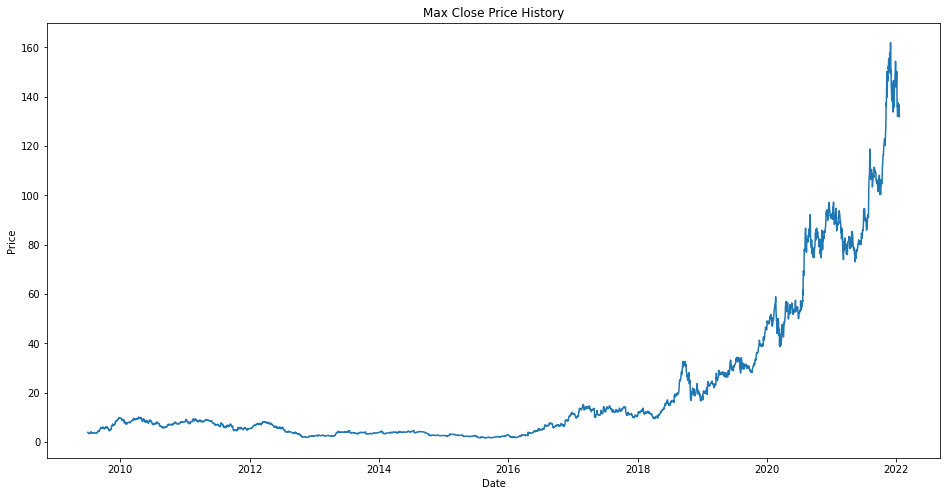

In [7]:
#max Close price history
plt.figure(figsize=(16, 8))
plt.title("Max Close Price History")
plt.plot(df1['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
#novo df com apenas a coluna de fechamento:
data = df1.filter(['Close'])
#converter para array
dataset = data.values
#pegar o numero de linhas para treinar o modelo:
training_data_len = math.ceil(len(dataset) * .90) #arredondar com math.ceil
#printando o tamanho de linhas do treino:
training_data_len

2844

In [9]:
#Escalar os dados (padrão):
scaler = MinMaxScaler(feature_range=(0,1)) #escala entre 0 e 1
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01428661],
       [0.01347558],
       [0.01204068],
       ...,
       [0.81801736],
       [0.84384554],
       [0.81296394]])

In [10]:
#create the training dataset
#create the scaled dataset
train_data = scaled_data[0:training_data_len , :]
#split the data in x and y:
x_train = []  #independent training
y_train = []  #target

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01428661, 0.01347558, 0.01204068, 0.01129203, 0.01085532,
       0.01160397, 0.01166635, 0.01210306, 0.01204068, 0.01397467,
       0.01434899, 0.01484809, 0.01590867, 0.01534718, 0.01204068,
       0.01229022, 0.01341319, 0.01360035, 0.01341319, 0.01303887,
       0.01272693, 0.01272693, 0.01322603, 0.0133508 , 0.01328841,
       0.01303887, 0.01297648, 0.01285171, 0.01229022, 0.01229022,
       0.01285171, 0.01291409, 0.01204068, 0.01210306, 0.01185352,
       0.01185352, 0.01297648, 0.01484809, 0.01497286, 0.01522241,
       0.01628299, 0.01778027, 0.01709402, 0.0162206 , 0.01659492,
       0.0181546 , 0.0181546 , 0.02227213, 0.02233452, 0.02345748,
       0.02532909, 0.02557864, 0.02657683, 0.02539148, 0.0252667 ,
       0.02545386, 0.02614012, 0.02782457, 0.02745025, 0.02520432])]
[0.02626489377302396]

[array([0.01428661, 0.01347558, 0.01204068, 0.01129203, 0.01085532,
       0.01160397, 0.01166635, 0.01210306, 0.01204068, 0.01397467,
       0.01434899, 0.01484809, 0.01

In [11]:
#converter os treinos para numpy arrays para treinar o LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#reshape the data to the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2784, 60, 1)

pronto, temos o dataset tridimensional

In [13]:
#Build the LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#train the model:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2784/2784 [==============================] - 77s 27ms/step - loss: 4.1825e-04


In [16]:
#create the testing dataset
#create new array with scaled values from index x em diante
test_data = scaled_data[training_data_len - 60: , :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #todos os valores que queremos prever
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [17]:
#convert the data to numpy array:
x_test = np.array(x_test) #novamente: convertendo para numpy array para usar no modelo LSTM

In [18]:
#Reshape the data again:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #overall, timesteps, feature

In [19]:
#now, get the models predicted values:
predictions = model.predict(x_test) #irá prever a exata mesma quantia de teste que está em y_test quando fazer a transform inversa
predictions = scaler.inverse_transform(predictions) #mesmo que y_test dataset contém (é o que queremos), e temos essas previsões baseadas em x_test dataset

In [20]:
#evaluate our model
#get the root mean squared error RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.370917018455795

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


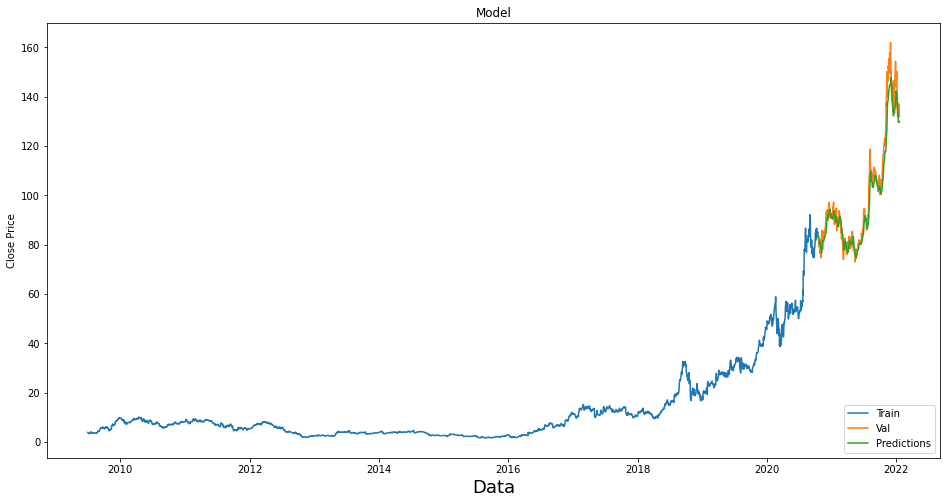

In [21]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-16,83.169998,83.700890
2020-10-19,82.000000,83.334557
2020-10-20,81.559998,82.856873
2020-10-21,79.199997,82.344826
2020-10-22,79.419998,81.553024
...,...,...
2022-01-11,137.309998,130.703369
2022-01-12,137.470001,129.796844
2022-01-13,132.740005,129.786926


In [23]:
#Get the price
test_price = pdr.DataReader(lista_ativos[5], 'yahoo', start='2009-07-01', end='2022-01-18')
teste_df = test_price.filter(['Close'])
#pegar os ultimos 60 dias
last_60 = teste_df[-60:].values
#escalando entre 0 e 1
last_60 = scaler.transform(last_60)
x2_teste = []
x2_teste.append(last_60)
#convert to numpy array
x2_teste = np.array(x2_teste)
#Reshape data
x2_teste = np.reshape(x2_teste, (x2_teste.shape[0], x2_teste.shape[1], 1))
#pega a previsão
pred_price = model.predict(x2_teste)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[129.72665]]


In [ ]:
test_price = pdr.DataReader(lista_ativos[5], 'yahoo', start='2009-07-01', end='2022-01-03')
teste_df = test_price.filter(['Close'])
teste_df.loc[datetime(2022, 1, 4)] = 35.284911
teste_df.loc[datetime(2022, 1, 5)] = 35.518165
teste_df #append pred()

In [ ]:
#predict longer:
last_60 = teste_df[-60:].values
#escalando entre 0 e 1
last_60 = scaler.transform(last_60)
x2_teste = []
x2_teste.append(last_60)
#convert to numpy array
x2_teste = np.array(x2_teste)
#Reshape data
x2_teste = np.reshape(x2_teste, (x2_teste.shape[0], x2_teste.shape[1], 1))
#pega a previsão
pred_price = model.predict(x2_teste)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
#pred_price_correct = pred_price * 1.044 quando for necessário constante
print(pred_price)

In [ ]:
#montando df com previsões:
pred_list = [16.896195, 17.096256, 17.359417, 17.65908, 17.980675, 18.316181]
pred_df = pd.DataFrame(pred_list)
pred_df = pred_df.rename(columns={ 0 : 'Predictions' })
pred_df

In [25]:
#vendo o preço de previous stocks:
#Get the price
test_price_final = pdr.DataReader(lista_ativos[5], 'yahoo', start='2009-11-4', end='2022-01-18')
print(test_price_final['Close'])

Date
2009-11-04      4.690000
2009-11-05      4.830000
2009-11-06      5.040000
2009-11-09      5.210000
2009-11-10      5.140000
                 ...    
2022-01-11    137.309998
2022-01-12    137.470001
2022-01-13    132.740005
2022-01-14    136.880005
2022-01-18    131.929993
Name: Close, Length: 3072, dtype: float64


In [ ]:
#estimando o preço (para Close maior que prediction)
Price_k = valid.Close[-1::] / valid.Predictions[-1::]
Price = Price_k * pred_price[0]
Price

In [ ]:
#cálculo de valorização em % (com rmse)
delta_apreciation = Price - valid.Close[-1::]
percentage = delta_apreciation * 100
final_percentage = percentage / Price
final_percentage

In [ ]:
#cálculo de valorização sem rmse (rmse apróx de 0):
delta_vlrz = pred_price[0] - valid.Close[-1::]
valorization = delta_vlrz * 100
final_val = valorization / valid.Close[-1::]
final_val

In [26]:
#estimando o preço (pred > Close)
Price_k = valid.Predictions[-1::] / valid.Close[-1::]
Price = Price_k * pred_price[0]
Price

Date
2022-01-18    127.741631
dtype: float64

In [27]:
#cálculo de valorização em %
delta_apreciation = Price - valid.Close[-1::]
percentage = delta_apreciation * 100
final_percentage = percentage / Price
final_percentage

Date
2022-01-18   -3.278776
dtype: float64

## No pregão do dia 19 fechou com 128, previsão com 99.81% de precisão como apontado pelo rmse...